In [2]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz
import seaborn as sns

In [5]:
sns.set_style("whitegrid")  # Use "white", "dark", "whitegrid", "darkgrid" or "ticks"
sns.set_context("talk")     # Use "paper", "talk", "poster" for different sizes

In [3]:
def read_solar_S_hdf5(file_path):
    with h5py.File(file_path, 'r') as f:
        r_over_R = np.array(f['/r_over_R'])
        c_s = np.array(f['/c_s'])
        Gamma_1 = np.array(f['/Gamma_1'])
        T0 = np.array(f['/T'])
        rho0 = np.array(f['/rho'])
        p0 = np.array(f['/p'])
        
        r_over_R = np.flip(r_over_R)
        c_s = np.flip(c_s)
        Gamma_1 = np.flip(Gamma_1)
        T0 = np.flip(T0)
        rho0 = np.flip(rho0)
        p0 = np.flip(p0)

    return r_over_R, c_s, Gamma_1, T0, rho0, p0

r_over_R, c_s, Gamma_1, T0, rho0, p0\
    =read_solar_S_hdf5("../additional_files/solar_s.h5")

In [19]:
def read_solar_S_hdf5(file_path):
    with h5py.File(file_path, 'r') as f:
        r = np.array(f['/r'])
        T0 = np.array(f['/T0'])
        rho0 = np.array(f['/rho0'])
        p0 = np.array(f['/p0'])
        g = np.array(f['/g'])
        grad_s0 = np.array(f['/grad_s0'])
        
    return r, T0, rho0, p0, g, grad_s0

r_, T0_, rho0_, p0_, g_, grad_s0_\
    =read_solar_S_hdf5("../data/HD_2D_1/background.h5")

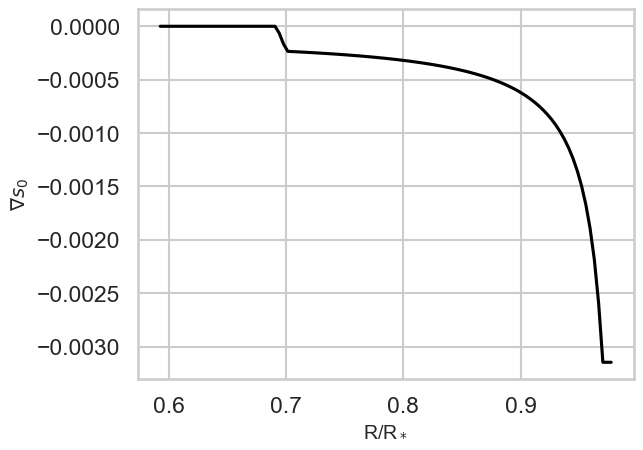

In [21]:
#plt.scatter(r_/R_sun, grad_s0_, color="black", s=10)
plt.plot(r_/R_sun, grad_s0_, color="black")
plt.xlabel("R/R$_*$", fontsize=14)
plt.ylabel(r"$\nabla s_0$", fontsize=14)
plt.show()

In [20]:
r_/R_sun

array([0.59293352, 0.59646676, 0.6       , 0.60362745, 0.6072549 ,
       0.61088235, 0.6145098 , 0.61813725, 0.62176471, 0.62539216,
       0.62901961, 0.63264706, 0.63627451, 0.63990196, 0.64352941,
       0.64715686, 0.65078431, 0.65441176, 0.65803922, 0.66166667,
       0.66529412, 0.66892157, 0.67254902, 0.67617647, 0.67980392,
       0.68343137, 0.68705882, 0.69068627, 0.69431373, 0.69794118,
       0.70156863, 0.70519608, 0.70882353, 0.71245098, 0.71607843,
       0.71970588, 0.72333333, 0.72696078, 0.73058824, 0.73421569,
       0.73784314, 0.74147059, 0.74509804, 0.74872549, 0.75235294,
       0.75598039, 0.75960784, 0.76323529, 0.76686275, 0.7704902 ,
       0.77411765, 0.7777451 , 0.78137255, 0.785     , 0.78862745,
       0.7922549 , 0.79588235, 0.7995098 , 0.80313725, 0.80676471,
       0.81039216, 0.81401961, 0.81764706, 0.82127451, 0.82490196,
       0.82852941, 0.83215686, 0.83578431, 0.83941176, 0.84303922,
       0.84666667, 0.85029412, 0.85392157, 0.85754902, 0.86117

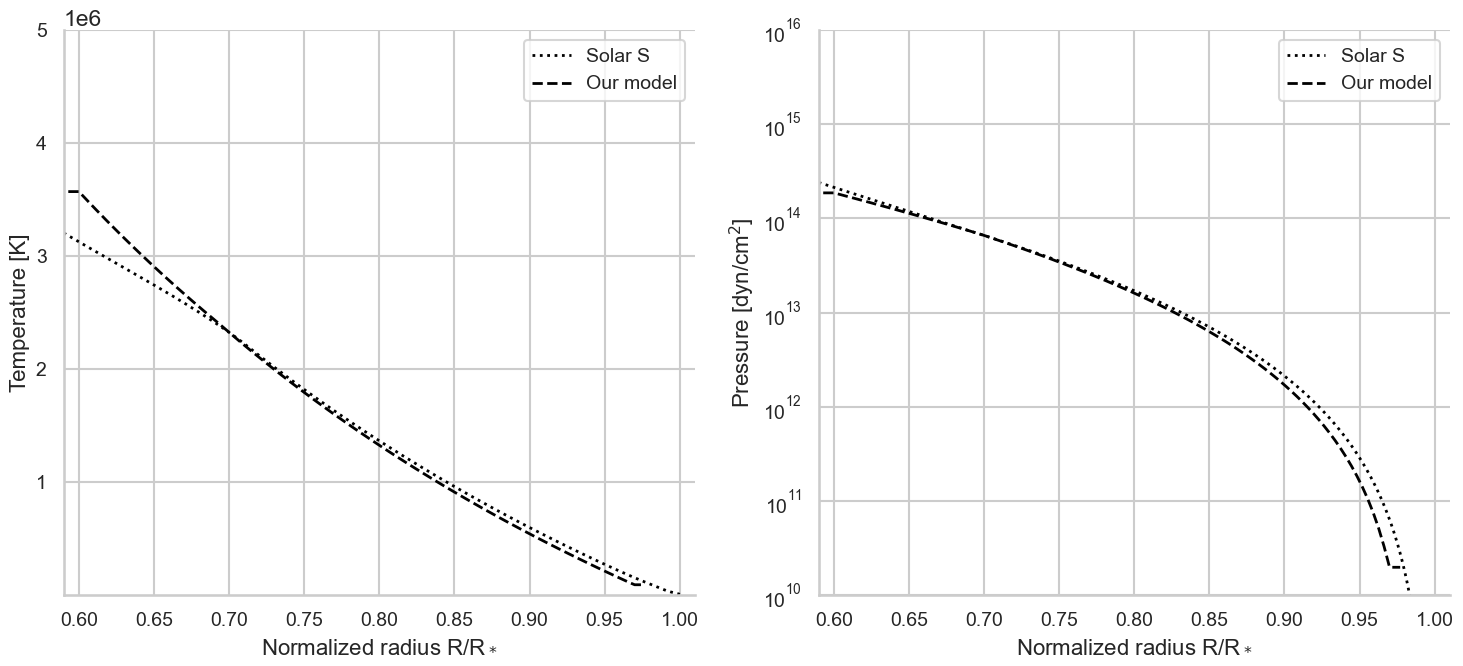

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 7))

ax[0].plot(r_over_R, T0, color="black", linestyle=":", linewidth=2, label="Solar S")
ax[0].plot(r_/R_sun, T0_, color="black", linestyle="--", linewidth=2, label="Our model")

ax[1].semilogy(r_over_R, p0, color="black", linestyle=":", linewidth=2, label="Solar S")
ax[1].semilogy(r_/R_sun, p0_, color="black", linestyle="--", linewidth=2, label="Our model")

for axis in ax:
    axis.tick_params(axis='both', labelsize=14)
    axis.set_xlabel("Normalized radius R/R$_*$", fontsize=16)
    axis.legend(fontsize=14)
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

ax[0].set_xlim(0.59, 1.01)
ax[0].set_ylim(1e3, 0.5e7)
ax[0].set_ylabel("Temperature [K]", fontsize=16)

ax[1].set_xlim(0.59, 1.01)
ax[1].set_ylim(1e10, 1e16)
ax[1].set_ylabel("Pressure [dyn/cm$^2$]", fontsize=16)

fig.tight_layout()
plt.show()


In [7]:
R_sun = 6.957e10
M_sun = 1.989e33
G = 6.6743e-8

M = 4*np.pi*R_sun**3 * cumtrapz(rho0*(r_over_R)**2, r_over_R, initial=0)
g = -G*M/((r_over_R*R_sun)**2)

/var/folders/k6/k6jkpmqs13l4qhz_xy4wzlmw0000gn/T/ipykernel_61115/103677430.py:6: RuntimeWarning: invalid value encountered in divide
  g = -G*M/((r_over_R*R_sun)**2)


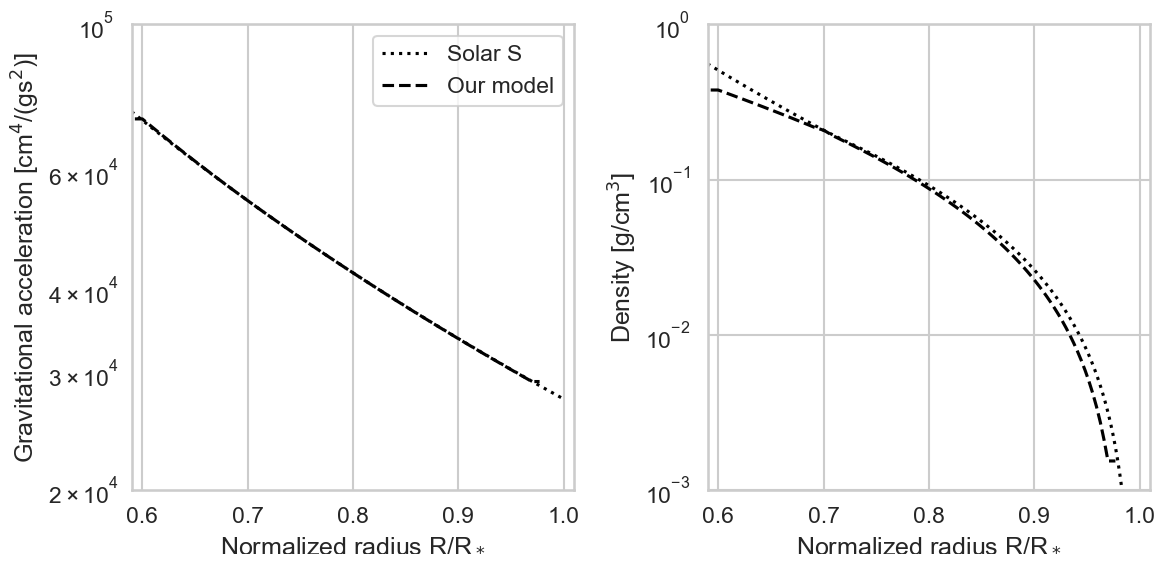

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].semilogy(r_over_R, np.abs(g), color="black", linestyle=":", label="Solar S")
ax[0].semilogy(r_/R_sun, np.abs(g_), color="black", linestyle="--", label="Our model")

ax[1].semilogy(r_over_R, rho0, color="black", linestyle=":", label="Solar S")
ax[1].semilogy(r_/R_sun, rho0_, color="black", linestyle="--", label="Our model")

ax[0].set_xlim(0.59,1.01)
ax[0].set_ylim(2e4,1e5)
ax[0].set_xlabel("Normalized radius R/R$_*$")
ax[0].set_ylabel("Gravitational acceleration [cm$^4$/(gs$^2$)]")
ax[0].legend()

ax[1].set_xlim(0.59,1.01)
ax[1].set_ylim(1e-3,0.1e1)
ax[1].set_xlabel("Normalized radius R/R$_*$")
ax[1].set_ylabel("Density [g/cm$^3$]")
ax[0].legend()

fig.tight_layout()
plt.show()

In [248]:
np.where(r_over_R>0.7)[0]

array([1046, 1047, 1048, ..., 2479, 2480, 2481])

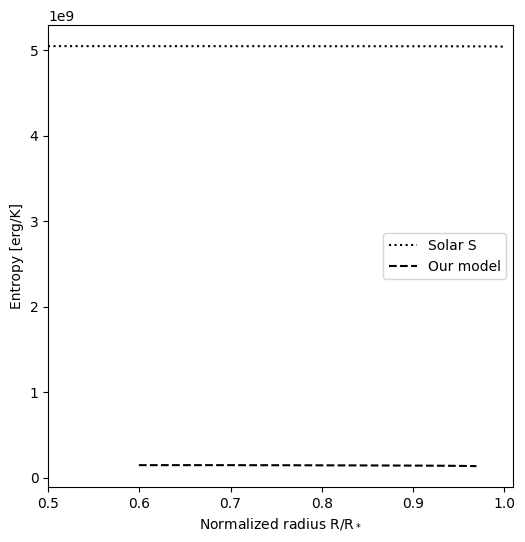

In [256]:
def k(r):
    # for now setting k as constant in radiative and convective zone
    if (r>=0.7*R_sun):
        return 0.001
    if r<0.7*R_sun:
        return 0

def get_nabla(r):
    nabla_ad = 0.4
    nabla_star = nabla_ad + k(r)
    return nabla_star, nabla_ad

gamma = 5/3

#Lantz after eq (10) 
r_star = P[0]/(rho0[0]*T0[0])
#Lantz after eq (72)
c_p = r_star/(1-1/Gamma_1[0])

s = np.zeros(len(T0))
s[0] = c_p*1e4

#entropy calculation
for i in range(0, len(T0)-1):
    dr = (r_over_R[i+1]-r_over_R[i])*R_sun
    
    H = - dr*p0[i+1]/(p0[i+1]-p0[i])
    #Lantz after eq (10) 
    r_star = p0[i+1]/(rho0[i+1]*T0[i+1])
    #Lantz after eq (72)
    c_p = r_star/(1-1/Gamma_1[i+1])
    nabla_star, nabla_ad = get_nabla(r_over_R[i+1]*R_sun)
    superad_param = nabla_star - nabla_ad
    
    ds_dr = - c_p/H * superad_param
    
    s[i+1] = s[i] + ds_dr * dr

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(r_over_R, s, color="black", linestyle=":", label="Solar S")
ax.plot(r_/R_sun, s0_, color="black", linestyle="--", label="Our model")

ax.set_xlim(0.5,1.01)
ax.set_xlabel("Normalized radius R/R$_*$")
ax.set_ylabel("Entropy [erg/K]")
ax.legend()

plt.show()